<a href="https://colab.research.google.com/github/AnirudhJM24/Rental-market-segmentation/blob/main/geographical_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
df = pd.read_csv('locationdistance.csv')

In [ ]:
df.head()

,Unnamed: 0,lat,lng,da,dr
0,0,18.580630,73.983310,6.853044,12.973710
1,1,18.488368,73.898667,10.389648,5.343271
2,2,18.564243,73.776857,15.045194,10.805272
3,3,18.540346,73.793718,13.884791,8.410823
4,4,18.550517,73.942494,4.167259,7.729086


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,lat,lng,da,dr
0,18.580630,73.983310,6.853044,12.973710
1,18.488368,73.898667,10.389648,5.343271
2,18.564243,73.776857,15.045194,10.805272
3,18.540346,73.793718,13.884791,8.410823
4,18.550517,73.942494,4.167259,7.729086


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     204 non-null    float64
 1   lng     204 non-null    float64
 2   da      204 non-null    float64
 3   dr      204 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB


In [ ]:
df['lng'].min()

73.5082939

In [ ]:
df['lng'].max()

74.58327676466772

In [ ]:
df['lng'].mean()

73.86334509177954

In [ ]:
df = df[df.lng<74]

In [ ]:
df

,lat,lng,da,dr
0,18.580630,73.983310,6.853044,12.973710
1,18.488368,73.898667,10.389648,5.343271
2,18.564243,73.776857,15.045194,10.805272
3,18.540346,73.793718,13.884791,8.410823
4,18.550517,73.942494,4.167259,7.729086
...,...,...,...,...
197,18.558533,73.877505,4.944011,3.228319
199,18.483838,73.855557,12.572741,5.390532
201,18.698728,73.790775,18.789686,20.601441
202,18.687791,73.508294,44.877882,42.240217


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     190 non-null    float64
 1   lng     190 non-null    float64
 2   da      190 non-null    float64
 3   dr      190 non-null    float64
dtypes: float64(4)
memory usage: 7.4 KB


In [ ]:
df.reset_index()

,index,lat,lng,da,dr
0,0,18.580630,73.983310,6.853044,12.973710
1,1,18.488368,73.898667,10.389648,5.343271
2,2,18.564243,73.776857,15.045194,10.805272
3,3,18.540346,73.793718,13.884791,8.410823
4,4,18.550517,73.942494,4.167259,7.729086
...,...,...,...,...,...
185,197,18.558533,73.877505,4.944011,3.228319
186,199,18.483838,73.855557,12.572741,5.390532
187,201,18.698728,73.790775,18.789686,20.601441
188,202,18.687791,73.508294,44.877882,42.240217


In [ ]:
pune_housing = folium.Map(location = [18.550518,	73.942494])

In [ ]:
lat = []
lng = []
lat = np.array(df['lat'].tolist())
lng = np.array(df['lng'].tolist())

In [ ]:
lat

array([18.5806299 , 18.4883683 , 18.5642431 , 18.5403459 , 18.5505175 ,
       18.51489115, 18.4779905 , 18.5618834 , 18.6047823 , 18.4858591 ,
       18.6053321 , 18.6279288 , 18.4945396 , 18.4784897 , 18.6022495 ,
       18.4358283 , 18.5000084 , 18.6523154 , 18.5386704 , 18.5930134 ,
       18.526967  , 18.5896886 , 18.5322658 , 18.5217663 , 19.03169355,
       18.4894038 , 18.5103652 , 18.6210093 , 18.6382904 , 18.57543   ,
       18.6642449 , 18.4694413 , 18.5336727 , 18.45515025, 18.5981553 ,
       18.5038889 , 18.588825  , 18.5504406 , 18.5608812 , 18.5696793 ,
       18.5184857 , 18.5045098 , 18.643269  , 18.5930207 , 18.51895545,
       18.6486364 , 18.4820444 , 18.5112818 , 18.5012279 , 18.6403548 ,
       18.5820266 , 18.4536792 , 18.6070438 , 18.57666105, 18.5906707 ,
       18.765549  , 18.4524549 , 18.5268544 , 18.7337107 , 18.466019  ,
       18.4681834 , 18.5746155 , 18.6512604 , 18.53951065, 18.5853217 ,
       18.6156694 , 18.4999781 , 18.4511242 , 18.4373984 , 18.59

In [ ]:
pune_housing

In [ ]:
fg = folium.FeatureGroup(name = 'pune')
for i in range(0, len(df)):
  fg.add_child(folium.Marker(location = [lat[i],lng[i]],icon = folium.Icon(color='red') ))


pune_housing.add_child(fg)

In [ ]:
df1 = pd.read_csv('/content/Punewithlocation.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8307 entries, 0 to 8306
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8307 non-null   int64  
 1   bedroom            8307 non-null   int64  
 2   bathrooms          8307 non-null   int64  
 3   area               8307 non-null   float64
 4   furnishing         8307 non-null   object 
 5   avalable_for       8307 non-null   object 
 6   address            8307 non-null   object 
 7   floor_number       8307 non-null   int64  
 8   facing             8307 non-null   object 
 9   floor_type         8307 non-null   object 
 10  gate_community     8307 non-null   object 
 11  corner_pro         8307 non-null   object 
 12  parking            8307 non-null   int64  
 13  wheelchairadption  8307 non-null   object 
 14  petfacility        8307 non-null   object 
 15  lightbill          8307 non-null   int64  
 16  powerbackup        8307 

In [ ]:
df3 = pd.merge(df1, df, how='inner', on=['lat', 'lng'])

In [ ]:
df3

,Unnamed: 0,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,lightbill,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,rent,lat,lng,da,dr
0,1,2,2,760.0,Unfurnished,All,Wagholi,5,East,Vitrified,Yes,Yes,2,None,None,0,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,40000,14000.0,18.580630,73.983310,6.853044,12.973710
1,58,1,1,457.0,Semifurnished,All,Wagholi,2,East,Ceramic,Yes,No,1,None,None,0,1,1 to 5 Year Old,1,0,0,0,0,0,0,0,3,11000.0,18.580630,73.983310,6.853044,12.973710
2,69,1,1,640.0,Furnished,All,Wagholi,1,North-East,Vitrified,Yes,Yes,1,None,None,0,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,30000,11000.0,18.580630,73.983310,6.853044,12.973710
3,93,1,2,600.0,Unfurnished,Family Only,Wagholi,6,No Direction,Not provided,No,No,1,None,None,0,0,1 to 5 Year Old,1,0,0,0,0,0,0,0,40000,9500.0,18.580630,73.983310,6.853044,12.973710
4,95,1,2,500.0,Unfurnished,Family Only,Wagholi,3,West,Not provided,No,No,1,None,None,0,0,1 to 5 Year Old,1,0,0,0,0,0,0,0,25000,8500.0,18.580630,73.983310,6.853044,12.973710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,5640,2,2,800.0,Unfurnished,Family Only,Talawade,4,West,Vitrified,Yes,No,1,Yes,None,0,1,5 to 10 Year Old,0,1,0,0,0,0,0,0,20000,12500.0,18.698728,73.790775,18.789686,20.601441
6975,5993,2,2,0.0,Furnished,All,Talawade,3,No Direction,Not provided,No,No,1,None,None,0,0,5 to 10 Year Old,1,0,0,0,0,0,0,0,30000,15000.0,18.698728,73.790775,18.789686,20.601441
6976,6057,3,3,0.0,Semifurnished,Family Only,Kedari Nagar,0,No Direction,Not provided,No,No,1,None,None,0,0,0 to 1 Year Old,1,0,0,0,0,0,0,0,3,32000.0,18.687791,73.508294,44.877882,42.240217
6977,7530,3,3,0.0,Semifurnished,Family Only,Kedari Nagar,0,No Direction,Not provided,No,No,1,None,None,0,0,0 to 1 Year Old,0,0,0,0,0,1,0,0,3,32000.0,18.687791,73.508294,44.877882,42.240217


In [ ]:
df4 = pd.DataFrame()
df4['lat'] = df3['lat']
df4['lng'] = df3['lng']
df4['da'] = df3['da']
df4['dr'] = df3['dr']
df4['rent'] = df3['rent']

In [ ]:
x = df.loc[:,].values

In [ ]:
x

array([[18.5806299 , 73.9833099 ,  6.85304417, 12.9737099 ],
       [18.4883683 , 73.8986672 , 10.38964757,  5.34327098],
       [18.5642431 , 73.7768573 , 15.04519388, 10.80527212],
       [18.5403459 , 73.7937182 , 13.88479138,  8.41082315],
       [18.5505175 , 73.9424945 ,  4.16725859,  7.72908622],
       [18.51489115, 73.92626218,  7.29078927,  5.89968568],
       [18.4779905 , 73.8940627 , 11.61506714,  6.16047883],
       [18.5618834 , 73.8101957 , 11.60148042,  7.48747184],
       [18.6047823 , 73.68831998, 24.43278656, 21.15188841],
       [18.4858591 , 73.8889844 , 10.90770307,  5.15639805],
       [18.6053321 , 73.7519996 , 17.77799668, 15.2339641 ],
       [18.6279288 , 73.8009829 , 13.46411773, 13.23840262],
       [18.4945396 , 73.7214015 , 22.86277129, 16.43460588],
       [18.4784897 , 73.8213256 , 15.23442593,  7.84248329],
       [18.6022495 , 73.7644454 , 16.42797781, 13.95556174],
       [18.4358283 , 73.8963635 , 16.16252245, 10.69385536],
       [18.5000084 , 73.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])

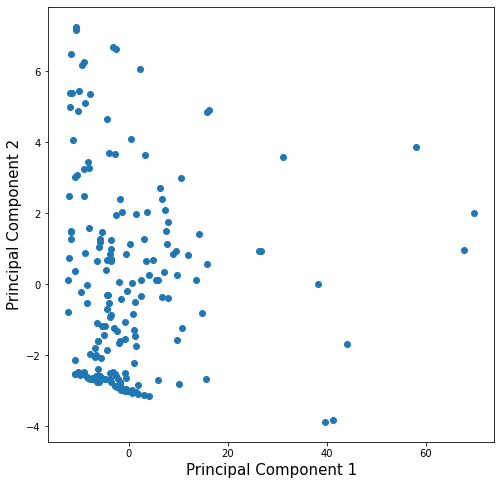

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal component 1']
               , pf['principal component 2'])

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

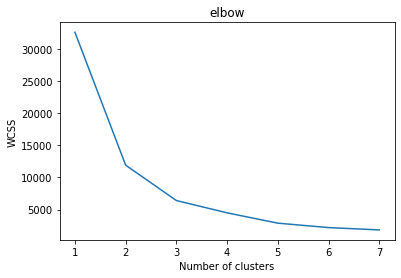

In [ ]:
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(n_clusters=7)

In [ ]:
kmeansp = kmeans.predict(x)

In [ ]:
labels = kmeans.labels_
print(labels[:100])

[0 5 6 0 4 4 0 0 3 5 6 6 3 0 6 6 6 6 0 0 4 4 4 5 2 0 0 0 3 4 6 0 4 6 0 0 0
 4 4 0 0 5 3 6 5 3 6 3 5 6 6 0 6 0 4 3 0 4 1 0 0 3 3 4 6 6 0 0 6 6 4 4 0 4
 5 6 6 0 0 0 5 0 4 4 2 3 0 0 4 5 0 4 4 4 0 5 0 1 5 1]


In [ ]:
df['cluster_num'] = labels

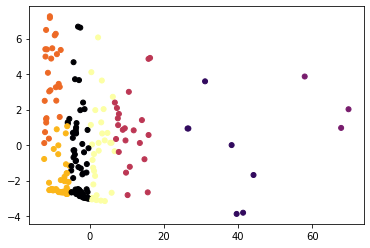

In [ ]:
plt.scatter(pf['principal component 1'], pf['principal component 2'], c=kmeansp, s=25, cmap='inferno')

In [ ]:
m2  = df.groupby(df['cluster_num'])
m2.mean()

,lat,lng,da,dr
cluster_num,,,,
0,18.522659,73.847196,12.453775,8.251031
1,18.591427,73.712461,38.114970,36.501155
2,19.052333,73.775789,56.094338,60.412223
3,18.635719,73.748810,20.640875,19.361836
4,18.557887,73.907866,4.067916,5.633150
5,18.515084,73.859347,10.025762,3.725666
6,18.563523,73.794535,15.875245,12.589535


In [ ]:
pune_housing_segments = folium.Map(location = [18.550518,	73.942494])

In [ ]:
fg1 = folium.FeatureGroup(name = 'pune')
fg1.add_child(folium.Marker(location = [18.522659,	73.847196],icon = folium.Icon(color='red',icon = "0") ))
fg1.add_child(folium.Marker(location = [18.591427,	73.712461],icon = folium.Icon(color='red',icon = "1") ))
fg1.add_child(folium.Marker(location = [19.052333,	73.775789],icon = folium.Icon(color='red',icon = '2') ))
fg1.add_child(folium.Marker(location = [18.635719,	73.748810	],icon = folium.Icon(color='red',icon = '2') ))
fg1.add_child(folium.Marker(location = [18.557887,	73.907866	],icon = folium.Icon(color='red',icon = '2') ))
fg1.add_child(folium.Marker(location = [18.515084,	73.859347	],icon = folium.Icon(color='red',icon = '2') ))
fg1.add_child(folium.Marker(location = [18.563523	,73.794535	],icon = folium.Icon(color='red',icon = '2') ))



pune_housing_segments.add_child(fg1)

In [ ]:
df3 = pd.merge(df1, df, how='inner', on=['lat', 'lng'])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6979 entries, 0 to 6978
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6979 non-null   int64  
 1   bedroom            6979 non-null   int64  
 2   bathrooms          6979 non-null   int64  
 3   area               6979 non-null   float64
 4   furnishing         6979 non-null   object 
 5   avalable_for       6979 non-null   object 
 6   address            6979 non-null   object 
 7   floor_number       6979 non-null   int64  
 8   facing             6979 non-null   object 
 9   floor_type         6979 non-null   object 
 10  gate_community     6979 non-null   object 
 11  corner_pro         6979 non-null   object 
 12  parking            6979 non-null   int64  
 13  wheelchairadption  6979 non-null   object 
 14  petfacility        6979 non-null   object 
 15  lightbill          6979 non-null   int64  
 16  powerbackup        6979 

In [ ]:
df3.head()

,Unnamed: 0,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,lightbill,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,rent,lat,lng,da,dr,cluster_num
0,1,2,2,760.0,Unfurnished,All,Wagholi,5,East,Vitrified,Yes,Yes,2,None,None,0,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,40000,14000.0,18.58063,73.98331,6.853044,12.97371,0
1,58,1,1,457.0,Semifurnished,All,Wagholi,2,East,Ceramic,Yes,No,1,None,None,0,1,1 to 5 Year Old,1,0,0,0,0,0,0,0,3,11000.0,18.58063,73.98331,6.853044,12.97371,0
2,69,1,1,640.0,Furnished,All,Wagholi,1,North-East,Vitrified,Yes,Yes,1,None,None,0,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,30000,11000.0,18.58063,73.98331,6.853044,12.97371,0
3,93,1,2,600.0,Unfurnished,Family Only,Wagholi,6,No Direction,Not provided,No,No,1,None,None,0,0,1 to 5 Year Old,1,0,0,0,0,0,0,0,40000,9500.0,18.58063,73.98331,6.853044,12.97371,0
4,95,1,2,500.0,Unfurnished,Family Only,Wagholi,3,West,Not provided,No,No,1,None,None,0,0,1 to 5 Year Old,1,0,0,0,0,0,0,0,25000,8500.0,18.58063,73.98331,6.853044,12.97371,0


In [ ]:
dcn = df3.groupby(['cluster_num'])

In [ ]:
dcn.mean()

,Unnamed: 0,bedroom,bathrooms,area,floor_number,parking,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,rent,lat,lng,da,dr
cluster_num,,,,,,,,,,,,,,,,,,,,,,
0,4072.817674,1.762824,1.740477,493.901666,3.094464,0.837481,0.179787,0.666836,0.791265,0.050279,0.045201,0.106145,0.022346,0.030980,0.0,5389.139157,35714.959878,15877.814090,18.532538,73.872839,11.628244,9.351061
1,4340.193548,1.556452,1.604839,395.282984,2.870968,0.830645,0.185484,0.572581,0.838710,0.072581,0.048387,0.080645,0.024194,0.008065,0.0,830.661290,22500.379032,10316.935484,18.515605,73.765172,36.893555,34.724365
2,4418.423423,1.747748,1.693694,368.059189,3.603604,0.765766,0.180180,0.423423,0.873874,0.027027,0.054054,0.036036,0.000000,0.018018,0.0,1761.279279,28815.621622,12046.846847,19.048307,73.890823,52.748146,58.272097
3,4242.585233,1.836048,1.817590,476.235320,3.173724,0.917481,0.192182,0.794788,0.767644,0.066232,0.058632,0.125950,0.038002,0.043431,0.0,2913.311618,30664.145494,149402.410137,18.617534,73.715983,22.376685,19.967966
4,4151.541989,1.788950,1.785083,525.814276,2.825967,0.904420,0.208287,0.688950,0.770718,0.065193,0.050829,0.094475,0.050829,0.031492,0.0,8027.908840,33029.810497,19171.708738,18.553051,73.917293,4.348929,6.201329
5,4277.238693,1.786432,1.726131,469.578141,2.726131,0.738693,0.145729,0.547739,0.814070,0.065327,0.052764,0.097990,0.035176,0.012563,0.0,10243.256281,53166.522613,20938.551960,18.506624,73.870217,10.144171,4.088909
6,4201.510328,1.902187,1.894897,555.724684,3.256987,0.910085,0.187120,0.747874,0.792831,0.053463,0.040097,0.095383,0.027947,0.044957,0.0,6594.777643,38695.595383,17751.582202,18.579225,73.786321,15.490750,12.589685


In [ ]:
cluster_list = [0,1,2,3,4,5,6]

In [ ]:
for i in cluster_list:
  dftemp = df3[df3.cluster_num == i]
  dftemp.to_csv('cluster_geog'+str(i)+'.csv')

In [ ]:
df3.to_csv('segmentedgeog.csv')